## ローパスフィルタの自作関数

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def lowpassFilter(img, msize=30):
  dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  rows, cols = img.shape
  crow, ccol = rows // 2 , cols // 2

  # create a mask first, center square is 1, remaining all zeros
  mask = np.zeros((rows, cols, 2), np.uint8)
  mask[crow-msize : crow+msize, ccol-msize : ccol+msize] = 1

  # apply mask and inverse DFT
  fshift = dft_shift * mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

  # 0~255で正規化
  img_back_max = img_back.max()
  img_back2 = (img_back * 255) / img_back_max
  img_back2 = img_back2.astype(np.uint8)
  return img_back2

## 画像プロットの自作関数

In [31]:
import cv2
import matplotlib.pyplot as plt

def plotImg(noise, imp, org):
  plt.figure(figsize=(12,5))
  # 画像をプロット
  plt.subplot(131).imshow(org, cmap="gray"), plt.title("original image")
  plt.subplot(132).imshow(noise, cmap="gray"), plt.title("noise image")
  plt.subplot(133).imshow(imp, cmap="gray"), plt.title("improvement image")
  plt.show()
  # PSNRを表示
  noise_psnr = cv2.PSNR(org, noise)
  imp_psnr = cv2.PSNR(org, imp)
  noise_psnr = cv2.PSNR(org, noise)
  imp_psnr = cv2.PSNR(org, imp)
  print("noize PSNR =", noise_psnr)
  print("improvement PSNR =", imp_psnr)
  print("diff PSNR = ", imp_psnr-noise_psnr)

hello

$$ y = ax^2 + bx + c $$
$$ x^2 + y^2 = a $$

## ローパスフィルタ

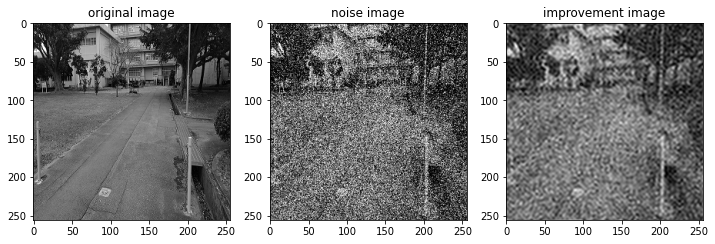

noize PSNR = 12.877533435267953
improvement PSNR = 18.107236735135704
diff PSNR =  5.229703299867751


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

dft = cv2.dft(np.float32(noise), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = noise.shape
crow, ccol = rows // 2 , cols // 2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-45 : crow+45, ccol-45 : ccol+45] = 1

# apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# 0~255で正規化
img_back_max = img_back.max()
img_back2 = (img_back * 255) / img_back_max
img_back2 = img_back2.astype(np.uint8)

# cv2.imwrite("img_back.bmp", img_back2)

# 画像をプロット
plotImg(noise, img_back2, org)

## ガウシアンフィルタ

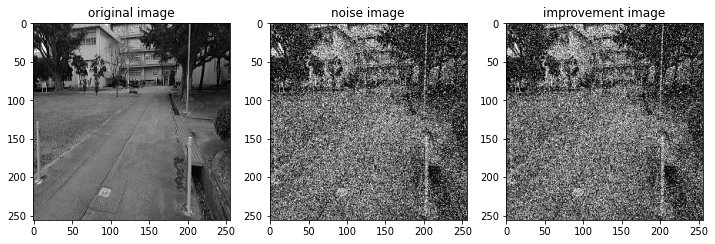

noize PSNR = 12.877533435267953
improvement PSNR = 12.877533435267953
diff PSNR =  0.0
ksize= (1, 1)


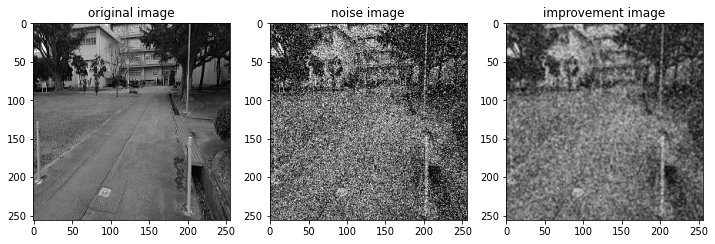

noize PSNR = 12.877533435267953
improvement PSNR = 18.92136086807564
diff PSNR =  6.043827432807689
ksize= (3, 3)


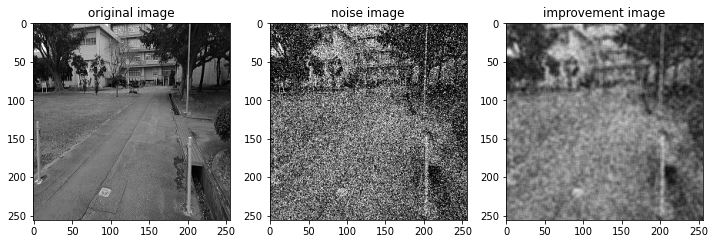

noize PSNR = 12.877533435267953
improvement PSNR = 19.695384671236237
diff PSNR =  6.817851235968284
ksize= (5, 5)


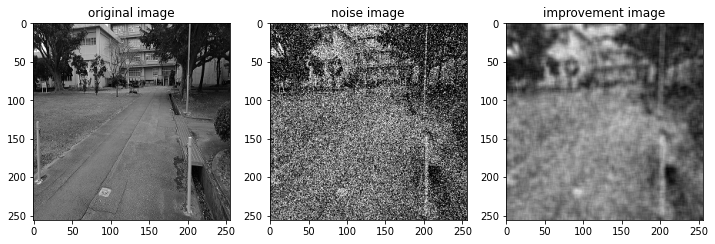

noize PSNR = 12.877533435267953
improvement PSNR = 19.65274367115726
diff PSNR =  6.775210235889308
ksize= (7, 7)


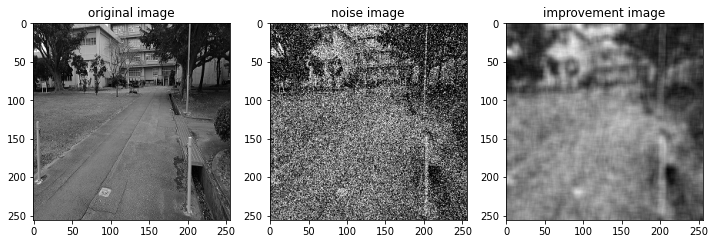

noize PSNR = 12.877533435267953
improvement PSNR = 19.476098154145806
diff PSNR =  6.598564718877853
ksize= (9, 9)


In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

stddev = np.std(noise)

for i in range(1, 10, 2):
  dst = cv2.GaussianBlur(noise, ksize=(i, i), sigmaX = int(stddev))

  plotImg(noise, dst, org)
  print("ksize=", (i, i))


## メディアンフィルタ

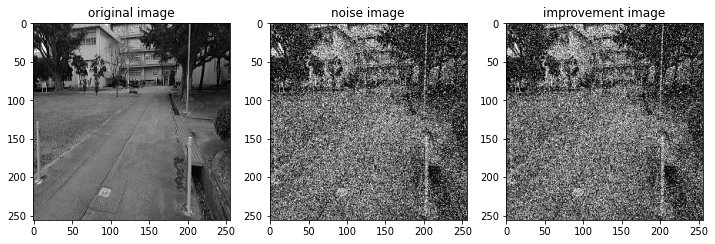

noize PSNR = 12.877533435267953
improvement PSNR = 12.877533435267953
diff PSNR =  0.0
ksize= (1, 1)


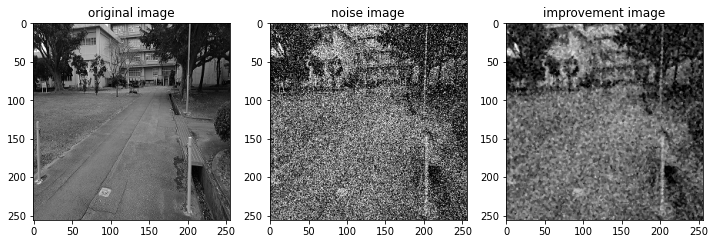

noize PSNR = 12.877533435267953
improvement PSNR = 18.00599457135831
diff PSNR =  5.128461136090358
ksize= (3, 3)


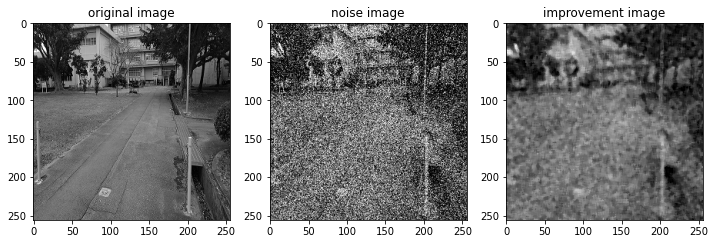

noize PSNR = 12.877533435267953
improvement PSNR = 19.52195406784608
diff PSNR =  6.644420632578129
ksize= (5, 5)


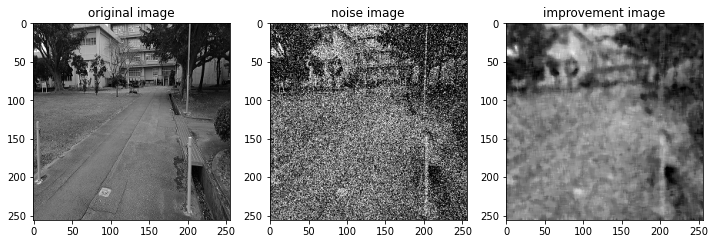

noize PSNR = 12.877533435267953
improvement PSNR = 19.848590874424605
diff PSNR =  6.971057439156652
ksize= (7, 7)


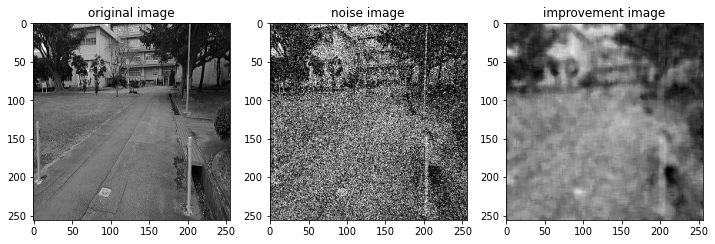

noize PSNR = 12.877533435267953
improvement PSNR = 19.795114983819214
diff PSNR =  6.9175815485512615
ksize= (9, 9)


In [57]:
import cv2
import matplotlib.pyplot as plt

# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

for i in range(1, 10, 2):
  dst = cv2.medianBlur(noise, i)

  plotImg(noise, dst, org)
  print("ksize=", (i, i))


## オープニング

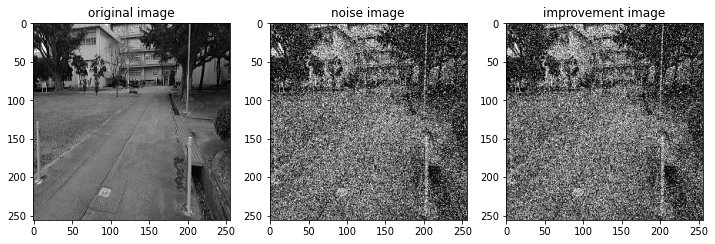

noize PSNR = 12.877533435267953
improvement PSNR = 12.877533435267953
diff PSNR =  0.0
ksize= (1, 1)


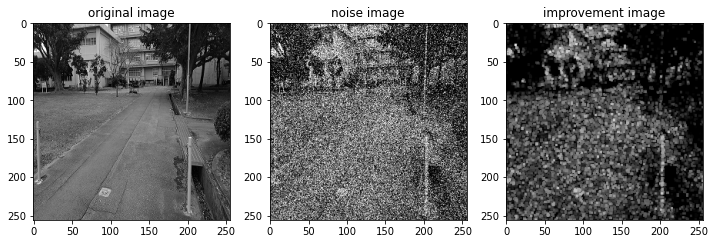

noize PSNR = 12.877533435267953
improvement PSNR = 12.634228613820135
diff PSNR =  -0.2433048214478184
ksize= (3, 3)


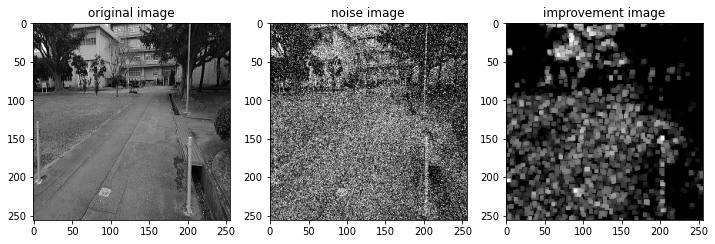

noize PSNR = 12.877533435267953
improvement PSNR = 10.22667329008443
diff PSNR =  -2.6508601451835236
ksize= (5, 5)


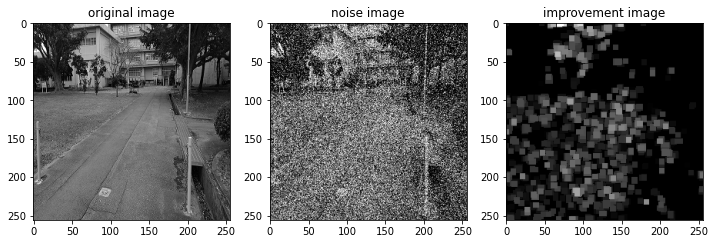

noize PSNR = 12.877533435267953
improvement PSNR = 9.130402761756715
diff PSNR =  -3.747130673511238
ksize= (7, 7)


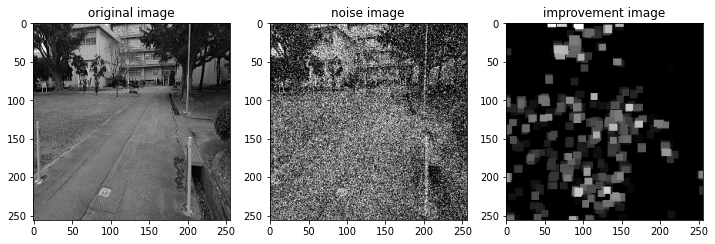

noize PSNR = 12.877533435267953
improvement PSNR = 8.58770003370061
diff PSNR =  -4.289833401567343
ksize= (9, 9)


In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

for i in range(1, 10, 2):
  kernel = np.ones((i,i),np.uint8)
  opening = cv2.morphologyEx(noise, cv2.MORPH_OPEN, kernel)
  plotImg(noise, opening, org)
  print("ksize=", (i, i))


## クロージング

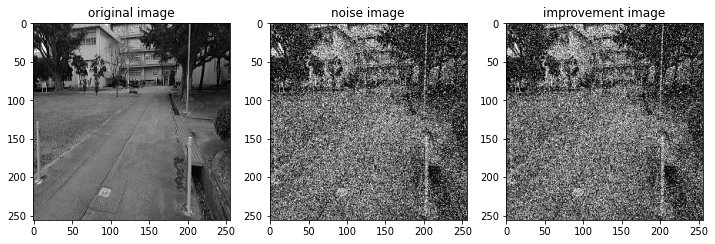

noize PSNR = 12.877533435267953
improvement PSNR = 12.877533435267953
diff PSNR =  0.0
ksize= (1, 1)


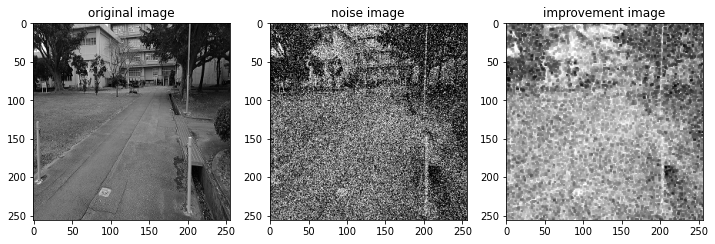

noize PSNR = 12.877533435267953
improvement PSNR = 11.105847117123009
diff PSNR =  -1.771686318144944
ksize= (3, 3)


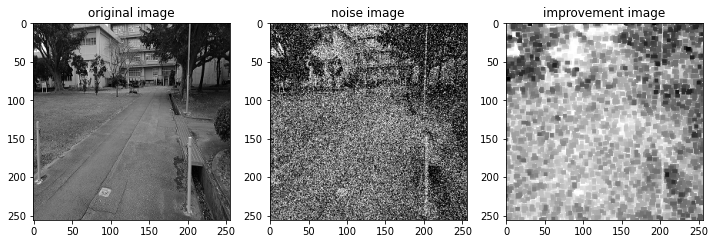

noize PSNR = 12.877533435267953
improvement PSNR = 8.351383351207922
diff PSNR =  -4.526150084060031
ksize= (5, 5)


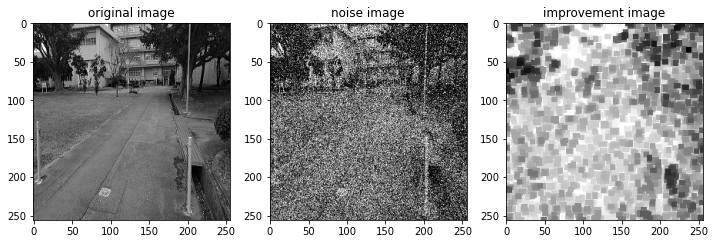

noize PSNR = 12.877533435267953
improvement PSNR = 6.795951514773936
diff PSNR =  -6.081581920494017
ksize= (7, 7)


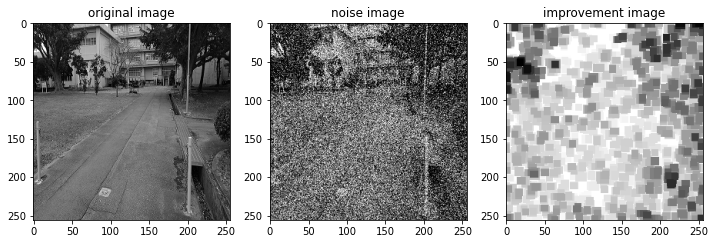

noize PSNR = 12.877533435267953
improvement PSNR = 5.837407778586425
diff PSNR =  -7.040125656681528
ksize= (9, 9)


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

for i in range(1, 10, 2):
  kernel = np.ones((i,i), np.uint8)
  opening = cv2.morphologyEx(noise, cv2.MORPH_CLOSE, kernel)
  plotImg(noise, opening, org)
  print("ksize=", (i, i))

## オープニング + クロージング

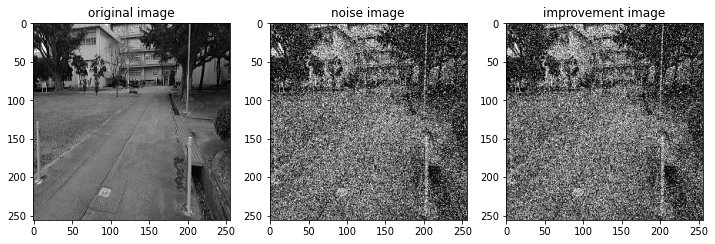

noize PSNR = 12.877533435267953
improvement PSNR = 12.877533435267953
diff PSNR =  0.0
ksize= (1, 1)


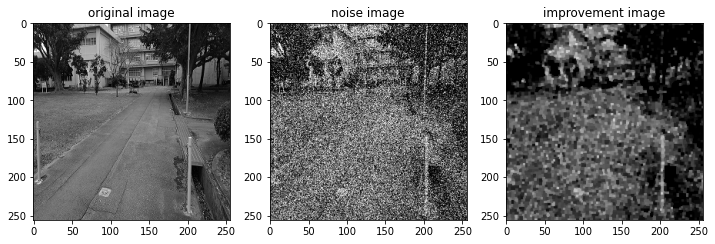

noize PSNR = 12.877533435267953
improvement PSNR = 13.62040607272932
diff PSNR =  0.7428726374613674
ksize= (3, 3)


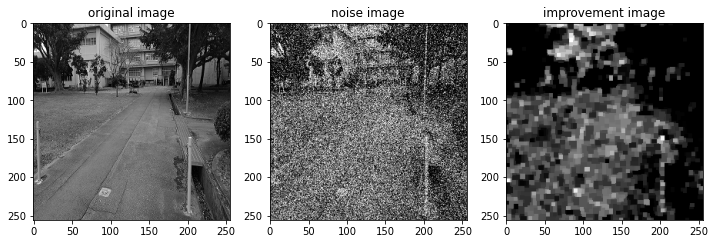

noize PSNR = 12.877533435267953
improvement PSNR = 10.603704212536195
diff PSNR =  -2.2738292227317576
ksize= (5, 5)


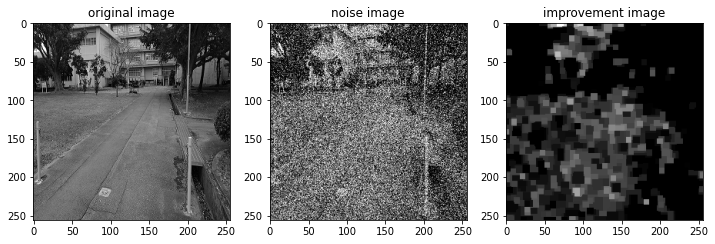

noize PSNR = 12.877533435267953
improvement PSNR = 9.3167612889575
diff PSNR =  -3.5607721463104536
ksize= (7, 7)


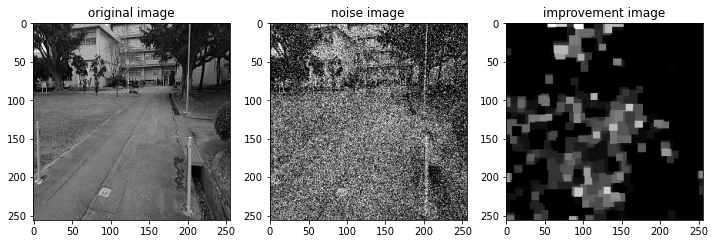

noize PSNR = 12.877533435267953
improvement PSNR = 8.655688587400723
diff PSNR =  -4.22184484786723
ksize= (9, 9)


In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

for i in range(1, 10, 2):
  kernel = np.ones((i,i),np.uint8)
  dst1 = cv2.morphologyEx(noise, cv2.MORPH_OPEN, kernel)
  dst2 = cv2.morphologyEx(dst1, cv2.MORPH_CLOSE, kernel)
  plotImg(noise, dst2, org)
  print("ksize=", (i, i))

## ローパスフィルタ + メディアンフィルタ + ガウシアンフィルタ

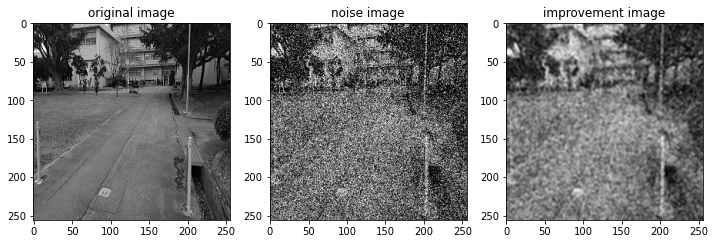

noize PSNR = 12.877533435267953
improvement PSNR = 19.946009299126548
diff PSNR =  7.068475863858595


In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 入力画像を読み込み
noise = cv2.imread("(ED15).bmp", 0)
org = cv2.imread("road.bmp", 0)

dst1 = lowpassFilter(noise, 55)

dst2 = cv2.medianBlur(dst1, 3)

dst3 = cv2.GaussianBlur(dst2, ksize=(3, 3), sigmaX = int(stddev))

# 画像をプロット
plotImg(noise, dst3, org)